<a href="https://colab.research.google.com/github/Shanmukh200/Data-analysis/blob/main/World_Happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/World-happiness-report-2024.csv')

# Display column names
print(df.columns)


Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [7]:
print(df.isnull().sum())


Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [8]:
print(df.describe())


       Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    143.000000    143.000000    143.000000          140.000000   
mean       5.527580      5.641175      5.413972            1.378807   
std        1.170717      1.155008      1.187133            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.726000      4.845500      4.606000            1.077750   
50%        5.785000      5.895000      5.674000            1.431500   
75%        6.416000      6.507500      6.319000            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.000000                 0.

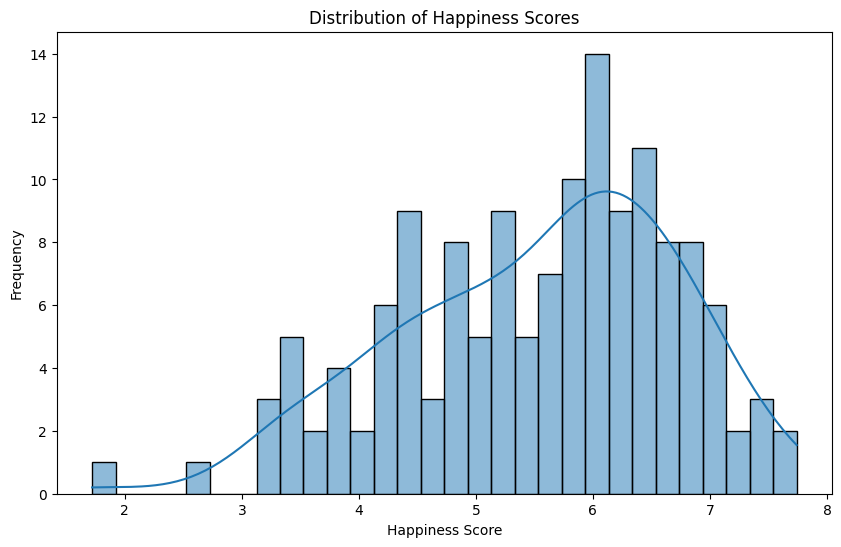

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Ladder score'], bins=30, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


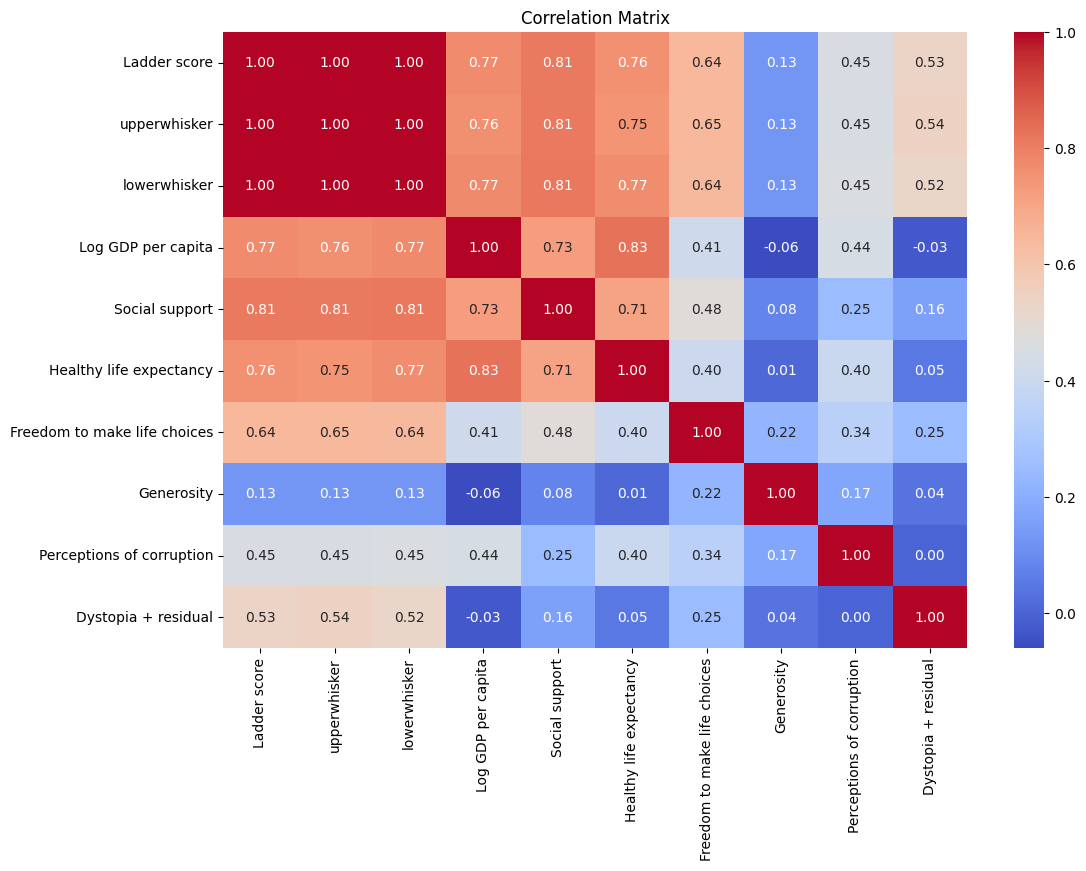

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



<ipython-input-12-b3fa1b2b0e45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder score', y='Country name', data=top_10_happiest, palette='viridis')


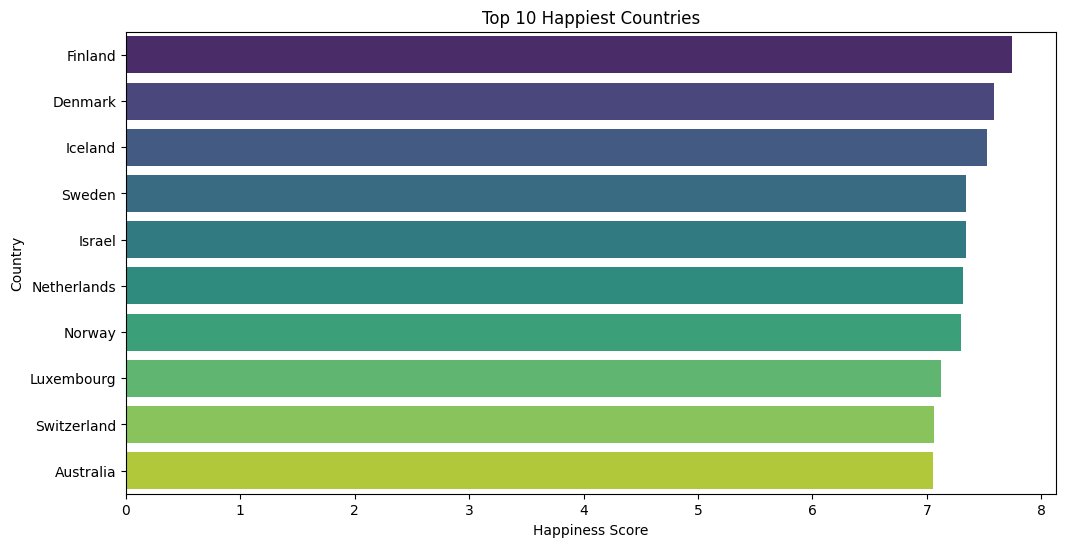

In [12]:
top_10_happiest = df.nlargest(10, 'Ladder score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Ladder score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


<ipython-input-13-3147e29ca3c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder score', y='Country name', data=bottom_10_happiest, palette='viridis')


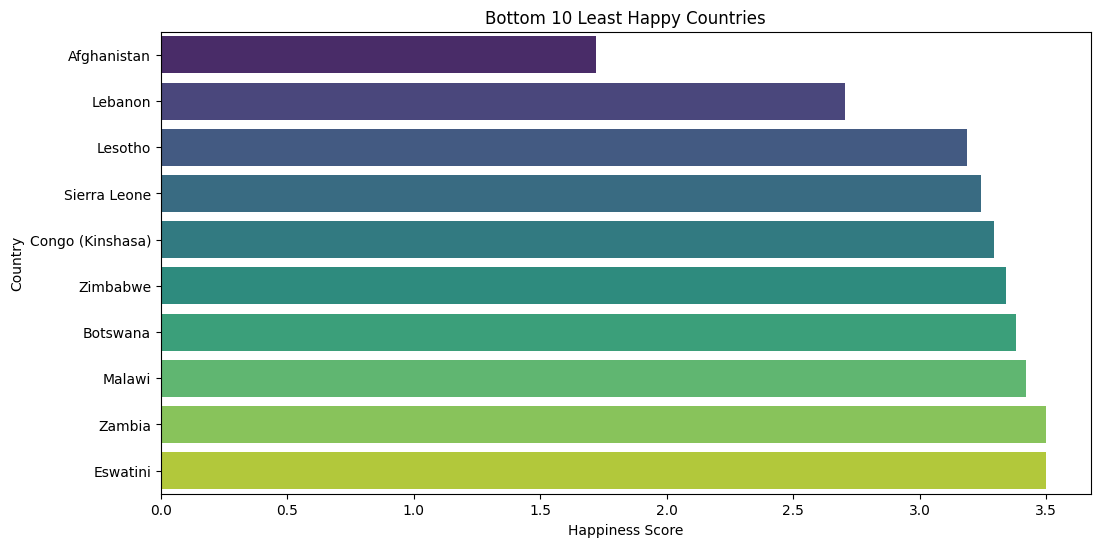

In [13]:
bottom_10_happiest = df.nsmallest(10, 'Ladder score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Ladder score', y='Country name', data=bottom_10_happiest, palette='viridis')
plt.title('Bottom 10 Least Happy Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


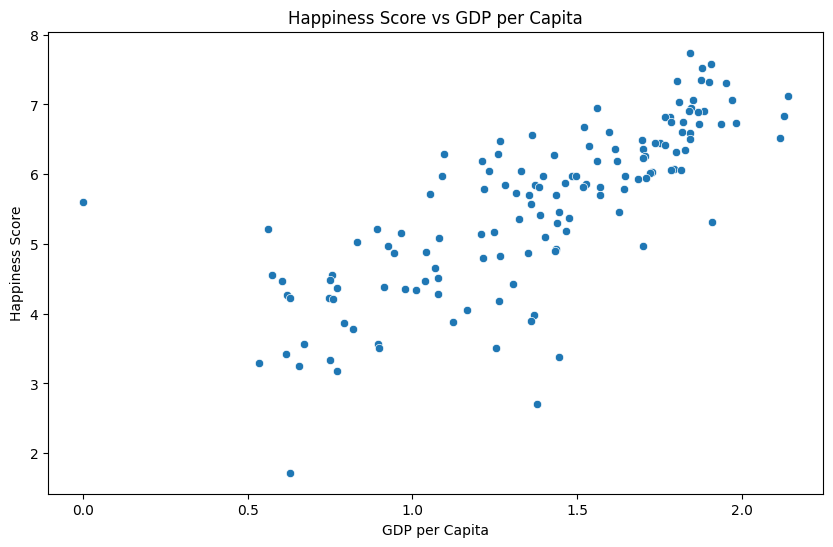

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='Ladder score', data=df)
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


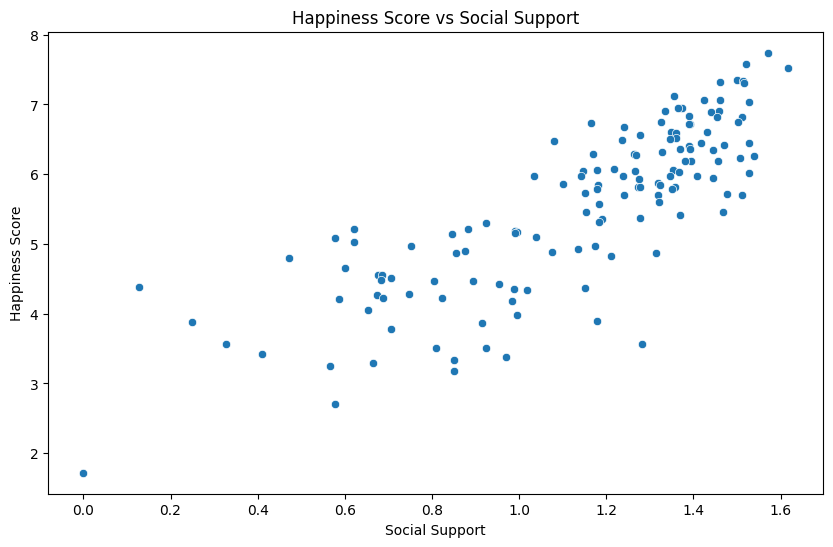

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Ladder score', data=df)
plt.title('Happiness Score vs Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()


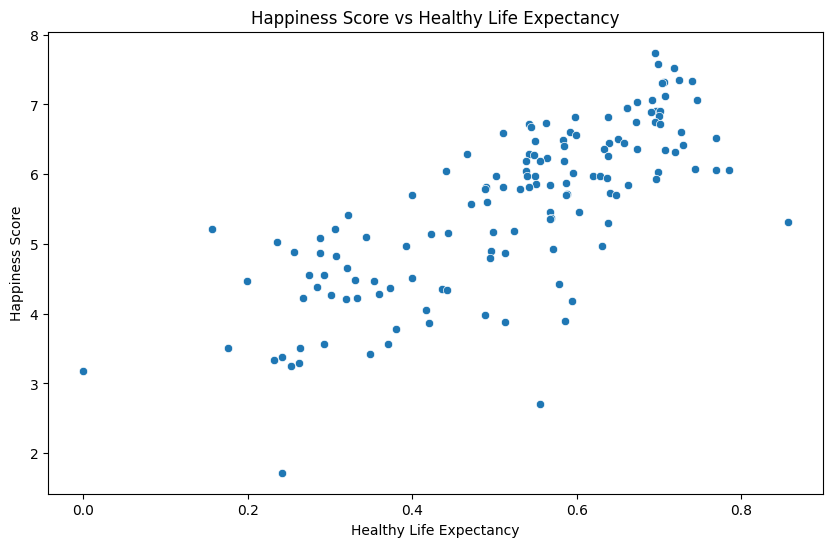

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthy life expectancy', y='Ladder score', data=df)
plt.title('Happiness Score vs Healthy Life Expectancy')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()


In [17]:
summary = {
    'Total Countries': df['Country name'].nunique(),
    'Average Happiness Score': df['Ladder score'].mean(),
    'Top 5 Happiest Countries': df.nlargest(5, 'Ladder score')['Country name'].values,
    'Bottom 5 Least Happy Countries': df.nsmallest(5, 'Ladder score')['Country name'].values
}

for key, value in summary.items():
    print(f"{key}: {value}")


Total Countries: 143
Average Happiness Score: 5.52758041958042
Top 5 Happiest Countries: ['Finland' 'Denmark' 'Iceland' 'Sweden' 'Israel']
Bottom 5 Least Happy Countries: ['Afghanistan' 'Lebanon' 'Lesotho' 'Sierra Leone' 'Congo (Kinshasa)']
